## Car Price Prediction

### Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### Data Loading

In [6]:
df = pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
df.shape

(301, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


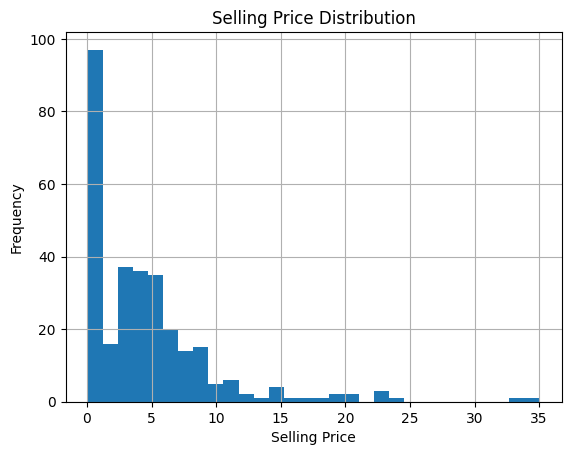

In [11]:
import matplotlib.pyplot as plt
df["Selling_Price"].hist(bins=30)
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.title("Selling Price Distribution")
plt.show()

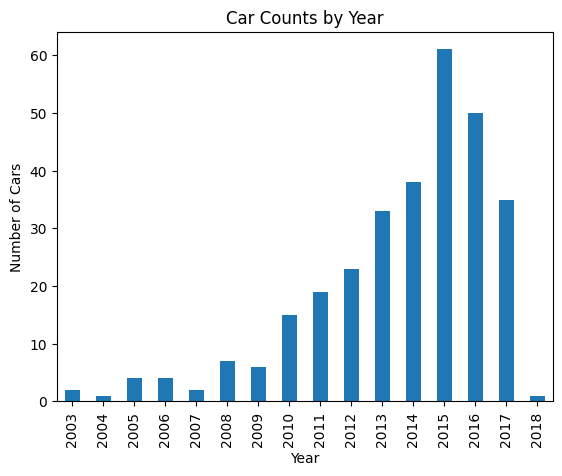

In [12]:
df["Year"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Number of Cars")
plt.title("Car Counts by Year")
plt.show()

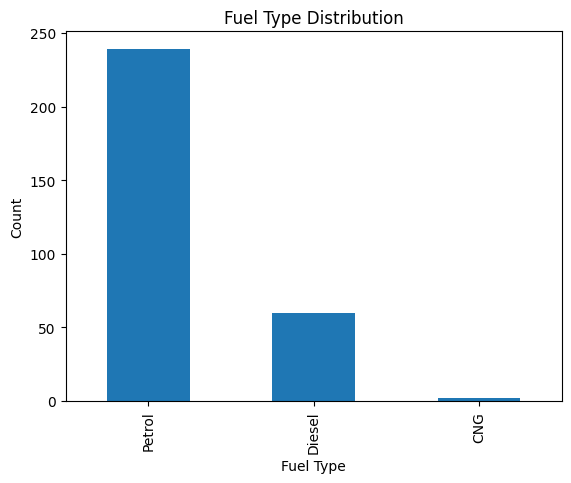

In [13]:
df["Fuel_Type"].value_counts().plot(kind="bar")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.title("Fuel Type Distribution")
plt.show()

## Correlation Heatmap

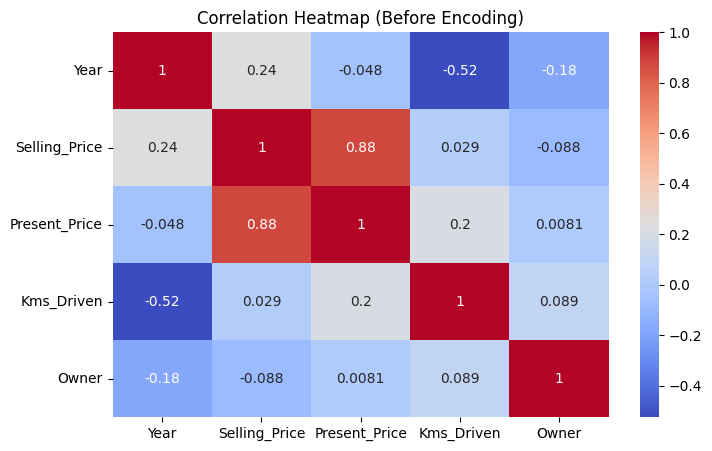

In [14]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Before Encoding)")
plt.show()

### Creating a New Feature: Car Age

In [15]:
current_year = datetime.now().year
df["Car_Age"] = current_year - df["Year"]

### Drop the columns Car_Name and Year

In [16]:
df.drop(['Car_Name','Year'],axis=1,inplace=True)

In [17]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,12
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,13
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,9
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,15
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,12


### One-Hot Encoding

In [18]:
df=pd.get_dummies(df,drop_first=True)

In [19]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,12,False,True,False,True
1,4.75,9.54,43000,0,13,True,False,False,True
2,7.25,9.85,6900,0,9,False,True,False,True
3,2.85,4.15,5200,0,15,False,True,False,True
4,4.60,6.87,42450,0,12,True,False,False,True


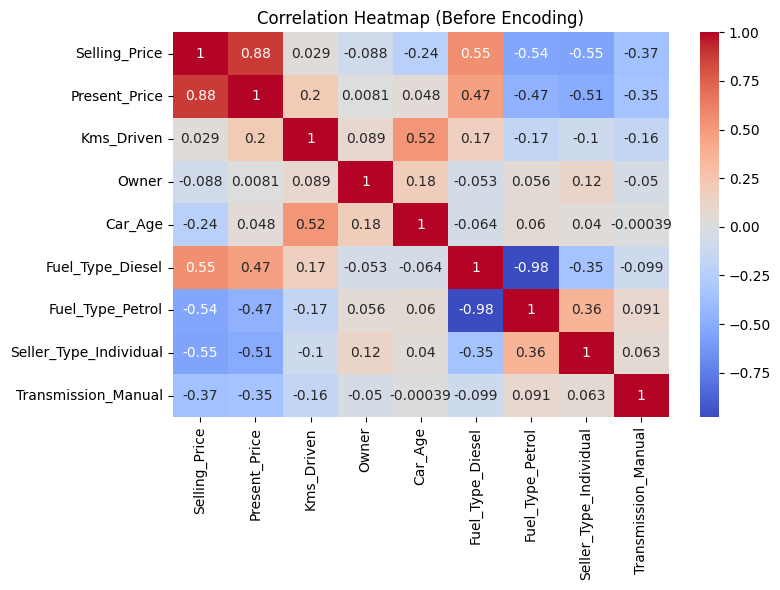

In [20]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Before Encoding)")
plt.show()

### Data Scaling

In [21]:
X=df.drop('Selling_Price',axis=1)
y=df['Selling_Price']

In [22]:
# Save feature column names
with open("model_features.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)


### Data Spliting

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Model Traning

In [24]:
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [25]:
# Save the trained model
with open("car_price_model.pkl", "wb") as f:
    pickle.dump(lr_model, f)


In [26]:
y_pred = lr_model.predict(X_test)

In [27]:
print("R2 Score :", r2_score(y_test, y_pred))
print("MAE      :", mean_absolute_error(y_test, y_pred))
print("MSE      :", mean_squared_error(y_test, y_pred))
print("RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score : 0.848981302489908
MAE      : 1.2162256821297004
MSE      : 3.478803970637871
RMSE     : 1.8651552135513738


In [28]:
loaded_model = pickle.load(open("car_price_model.pkl", "rb"))
print("Sample Prediction:", loaded_model.predict(X_test.iloc[:1]))

print("✅ Model training & saving completed successfully!")

Sample Prediction: [2.95534303]
✅ Model training & saving completed successfully!
